This is meant to analyse the statistics of a youtube channel to draw specific insights about it.

In [1]:
from youtube_api import YoutubeAPI

In [2]:
api = YoutubeAPI(video_url="https://www.youtube.com/watch?v=BhKAAdTvLSU")

In [3]:
api.get_uploads_playlist_id()
api.get_video_ids_from_playlist()

['suQkR6tT6NA',
 'CjWuIWfFy6k',
 'PJ9fJIhNj0I',
 'v76rCywxjJk',
 'YhB7vToP-yA',
 '-oBxF1_ZQaI',
 'mk6jZ-jSRPQ',
 'BLwWXBIYqwE',
 '5PrAgH4RF00',
 '6bZvv94E4aA',
 'JPi6ifxGQa0',
 'k3px_swd4Cg',
 'gvXuBtm8Iw0',
 'YMT5h6M0u20',
 'fabEhZYPUs4',
 'jY-zkNU0-kA',
 'WZKhDCGoQ-0',
 'CzbhF5lM78o',
 'TNeYyNJCc9U',
 'Dmqk2hgAtsQ',
 'f7HMTleTN44',
 '6aGQVd9cEX8',
 'NHpu7JiaXgM',
 'eW2Mh1brhXo',
 'IulFsa0TJgQ',
 'SFjcydfGtvk',
 'LvNPFhvPugI',
 'RvkzbfLvikE',
 'N72OxQRu1NU',
 'uSRe5QXScUE',
 'Epd07mDwOGs',
 'AaGDrpjzr4I',
 'nuQFh-ZDrhE',
 '1Ig76d9HPuo',
 'aYbM-VrnKpE',
 'K0_L1Zq8Epw',
 'byJHXQ03gk0',
 'BRbvALTHtG8',
 'OMKJyM3bXAs',
 'ftZ1OTh2vY4',
 '7CcsaSF-1pk',
 '4UKYPCx0Onk',
 '3Efh44Aefp0',
 'upORvPusiq8',
 'GEDxjqoVo3E',
 '_YLy_Q5FhAg',
 'hhCrOBxXkAM',
 'dKCa85zxFQo',
 'Lfd89owBaYU',
 '6Ffg9hynqjc',
 '4TryRo2JK5o',
 '9CKjssjhmCo',
 'D5Ux-gK8PX8',
 'zlFkZjJPs8s',
 '3iRRBt1zOwY',
 '65G4zmhh09A',
 'IzPM_FMiPE8',
 'nq5jKVFyZ14',
 '5svNh6FCiiA',
 '23YOxL2pCyM',
 'Ittt5uVSUt0',
 'eBSNDERXV6M',
 'ZrD2Oz

In [4]:
data = api.get_video_stats()

In [15]:
data

[{'videoId': 'suQkR6tT6NA',
  'viewCount': '530',
  'likeCount': '6',
  'commentCount': '0',
  'duration': 'PT1M',
  'videoTitle': 'Zwilling Fresh and Save Vacuum Bag Demo #zwilling #freshandsave #vacuumsealer',
  'publishedAt': '2024-10-06T20:47:12Z'},
 {'videoId': 'CjWuIWfFy6k',
  'viewCount': '32',
  'likeCount': '1',
  'commentCount': '0',
  'duration': 'PT12M36S',
  'videoTitle': 'ArtsEvo iPhone 16 Series Phone Cases in MANY Colors & Styles',
  'publishedAt': '2024-10-03T16:00:18Z'},
 {'videoId': 'PJ9fJIhNj0I',
  'viewCount': '426',
  'likeCount': '9',
  'commentCount': '1',
  'duration': 'PT5M40S',
  'videoTitle': 'HDMI Streaming Device for your Car! Ottocast TV Car Mate Demo Review',
  'publishedAt': '2024-10-01T16:00:18Z'},
 {'videoId': 'v76rCywxjJk',
  'viewCount': '177',
  'likeCount': '4',
  'commentCount': '0',
  'duration': 'PT10M52S',
  'videoTitle': '3 Unique MagSafe Cases for iPhone 16 Series by Benks',
  'publishedAt': '2024-09-28T00:26:56Z'},
 {'videoId': 'YhB7vToP-yA

In [29]:
import json

with open("data/data.jsonl", "w", encoding="utf-8") as fp:
    for record in data:
        json.dump(record, fp)
        fp.write("\n")

### Exploratory Analysis

In [4]:
import pandas as pd

In [5]:
import json

with open("data/data.jsonl", encoding="utf-8") as fp:
    data = [json.loads(record) for record in fp]

In [6]:
df = pd.DataFrame(data)

In [7]:
df.head(2)

,videoId,viewCount,likeCount,commentCount,duration,videoTitle,publishedAt
0,suQkR6tT6NA,530,6,0,PT1M,Zwilling Fresh and Save Vacuum Bag Demo #zwill...,2024-10-06T20:47:12Z
1,CjWuIWfFy6k,32,1,0,PT12M36S,ArtsEvo iPhone 16 Series Phone Cases in MANY C...,2024-10-03T16:00:18Z


In [8]:
df.dtypes

videoId         object
viewCount       object
likeCount       object
commentCount    object
duration        object
videoTitle      object
publishedAt     object
dtype: object

In [9]:
df['publishedAt'] = pd.to_datetime(df.publishedAt)
df['viewCount'] = pd.to_numeric(df.viewCount)
df['likeCount'] = pd.to_numeric(df.likeCount)
df['commentCount'] = pd.to_numeric(df.commentCount)

In [10]:
df.dtypes

videoId                      object
viewCount                     int64
likeCount                     int64
commentCount                  int64
duration                     object
videoTitle                   object
publishedAt     datetime64[ns, UTC]
dtype: object

### Visualization

#### Seaborn

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df.set_index('publishedAt', inplace=True)

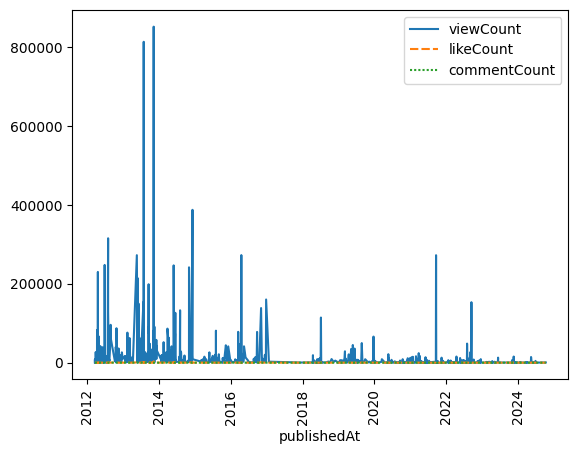

In [13]:
fig, ax = plt.subplots()
sns.lineplot(data=df, ax=ax)
plt.xticks(rotation=90)
plt.show()

#### Plotly

In [14]:
import plotly.graph_objects as go

In [15]:
df.head(1)

,videoId,viewCount,likeCount,commentCount,duration,videoTitle
publishedAt,,,,,,
2024-10-06 20:47:12+00:00,suQkR6tT6NA,530,6,0,PT1M,Zwilling Fresh and Save Vacuum Bag Demo #zwill...


In [29]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['viewCount'],
                         mode="lines+markers",
                         name="viewCount",
                         customdata=df[['videoTitle', 'videoId']],
                         hovertemplate=
                        '<b>publishedAt</b>: %{x}<br>' +
                        '<b>viewCount</b>: %{y:.2f}<br>' +
                        '<b>videoTitle</b>: %{customdata[0]}<br>' +
                        '<b>videoId</b>: %{customdata[1]}' +
                        '<extra></extra>',))
fig.add_trace(go.Scatter(x=df.index, y=df['likeCount'],
                             mode="lines",
                             name="likeCount"))
fig.add_trace(go.Scatter(x=df.index, y=df['commentCount'],
                         mode="lines",
                         name="commentCount"))
